In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

if not os.path.exists("images"):
    os.mkdir("images")

In [3]:
data_taem = pd.read_csv('taem_log.csv').astype('float64')

data_taem['time'] = data_taem['time'] - data_taem['time'][0]

data_taem.head()

data_taem.dtypes

,iphase,time,alt,speed,mach,hdot,lat,long,x,y,...,dpsac,nzc,nztotal,phic_at,dsbc_at,eow,es,en,emep,Unnamed: 22
0,1.0,0.00,43370.125715,1581.734577,4.874697,-129.727581,29.615943,-79.041325,19966.722192,194677.677185,...,-6.570841,-0.192,0.792928,40.0,1.0,170930.920071,148023.586473,125856.355511,97133.049303,NaN
1,1.0,0.22,43341.552572,1581.048589,4.873196,-130.077628,29.614380,-79.044400,19959.579378,194333.365424,...,-6.577405,-0.288,0.697304,40.0,1.0,170791.726354,148023.586473,125663.740865,97133.049303,NaN
2,1.0,0.44,43312.901965,1580.373283,4.871703,-130.448350,29.612818,-79.047474,19952.443416,193989.208192,...,-6.586515,-0.384,0.601787,40.0,1.0,170654.224543,148023.586473,125471.277995,97133.049303,NaN
3,1.0,0.66,43284.165259,1579.714996,4.870257,-130.846017,29.611256,-79.050546,19945.315343,193645.202160,...,-6.595848,-0.480,0.506149,40.0,1.0,170519.424776,148023.586473,125278.910404,97133.049303,NaN
4,1.0,0.88,43255.334212,1579.065476,4.868861,-131.257186,29.609695,-79.053617,19938.195898,193301.344086,...,-6.605357,-0.500,0.486161,40.0,1.0,170385.986443,148023.586473,125086.634720,97133.049303,NaN


iphase         float64
time           float64
alt            float64
speed          float64
mach           float64
hdot           float64
lat            float64
long           float64
x              float64
y              float64
rpred          float64
herror         float64
psha           float64
dpsac          float64
nzc            float64
nztotal        float64
phic_at        float64
dsbc_at        float64
eow            float64
es             float64
en             float64
emep           float64
Unnamed: 22    float64
dtype: object

In [4]:
# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data_taem['long'],
    lat=data_taem['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data_taem['speed'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data_taem['speed'].min(),
        cmax=data_taem['speed'].max(),
        colorbar=dict(title='Speed')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Speed: %{customdata}<extra></extra>',
    text=data_taem['alt'],
    customdata=data_taem['speed']
)

center_lat = (data_taem['lat'].min() + data_taem['lat'].max()) / 2
center_lon = (data_taem['long'].min() + data_taem['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,

        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),

    )
)

# Create the figure and add the trace
fig_traj = go.Figure(data=[trace], layout=layout)

fig_traj.update_layout(
    autosize=False,
    width=800,
    height=800,)


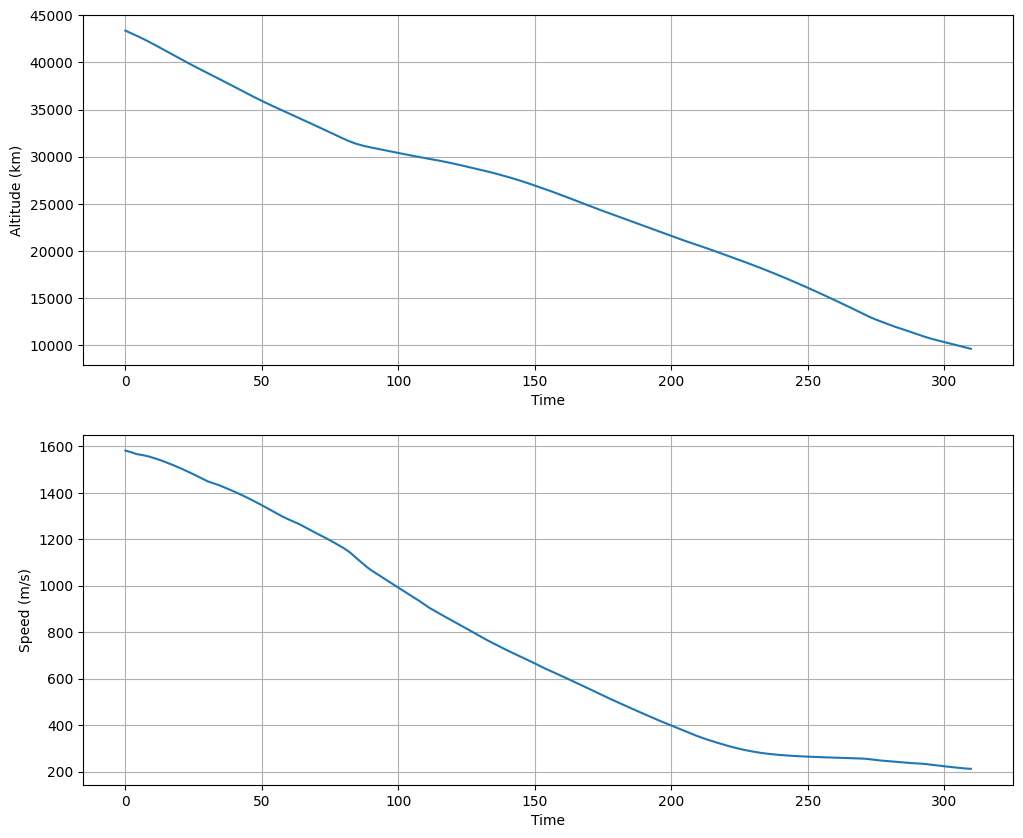

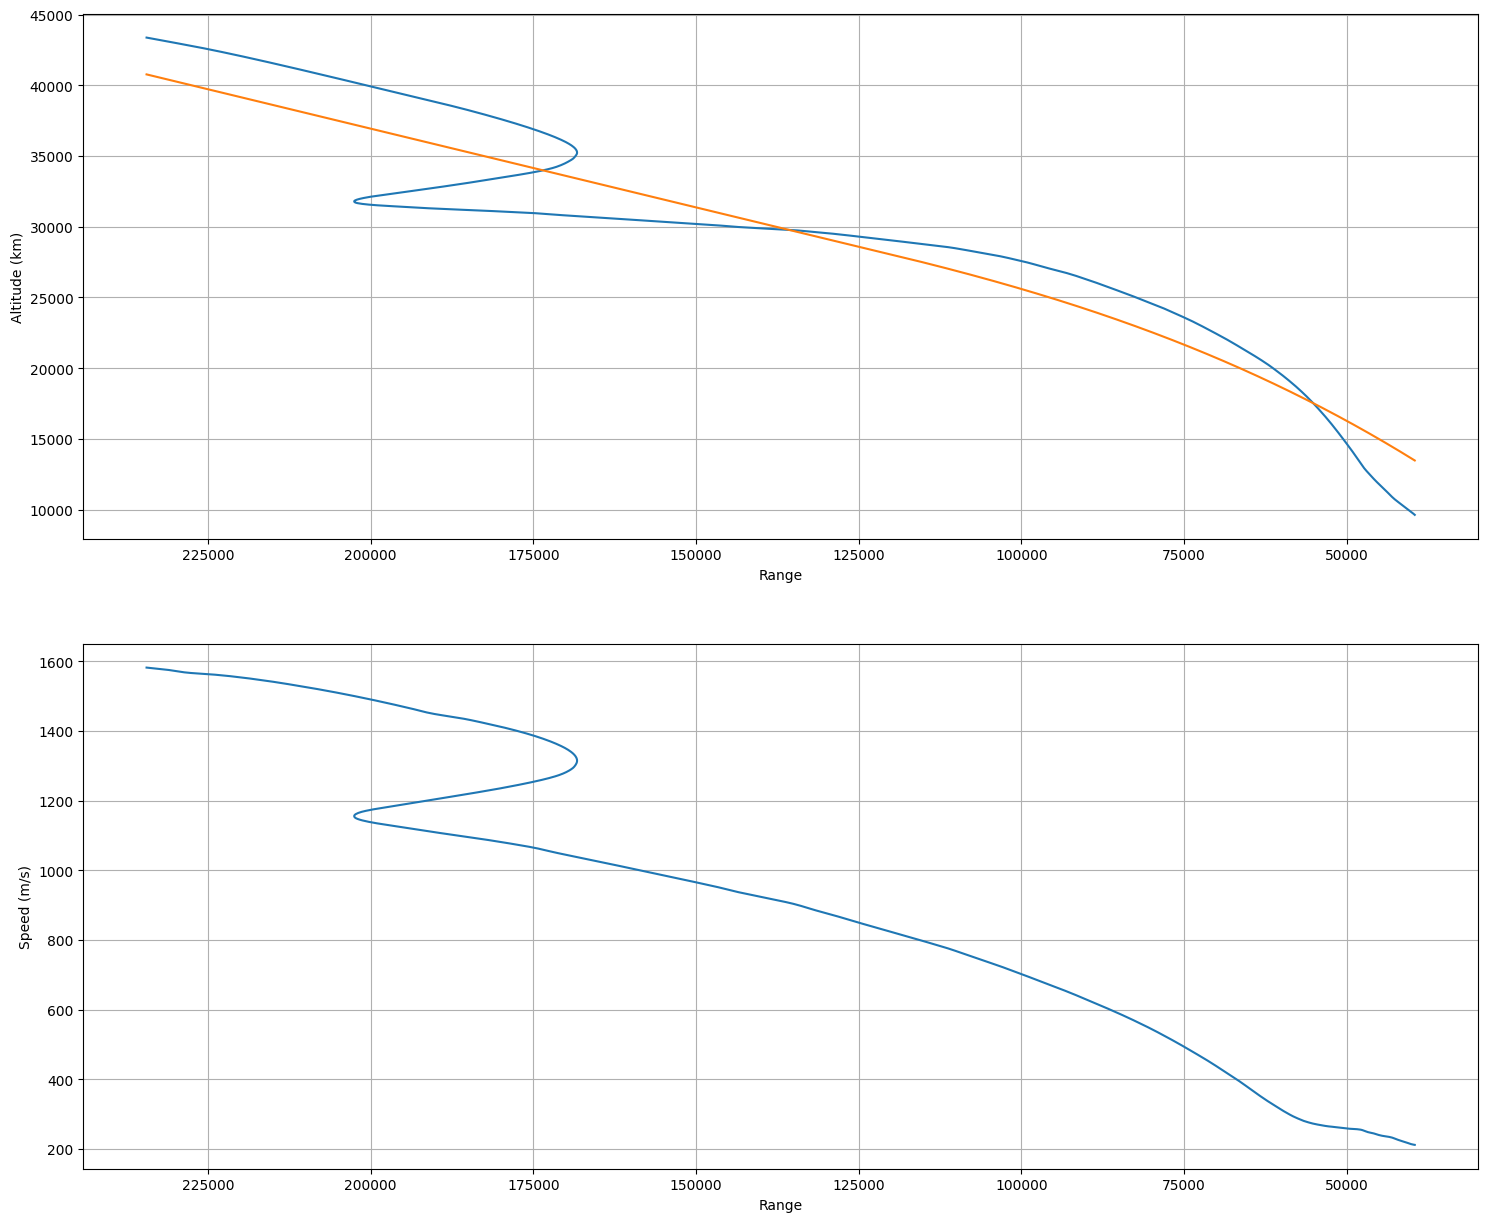

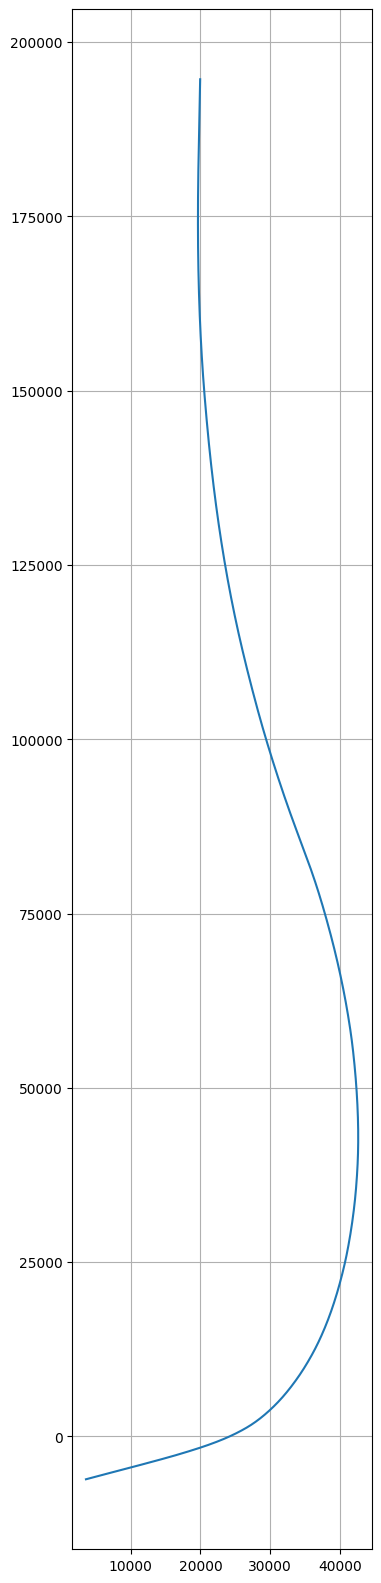

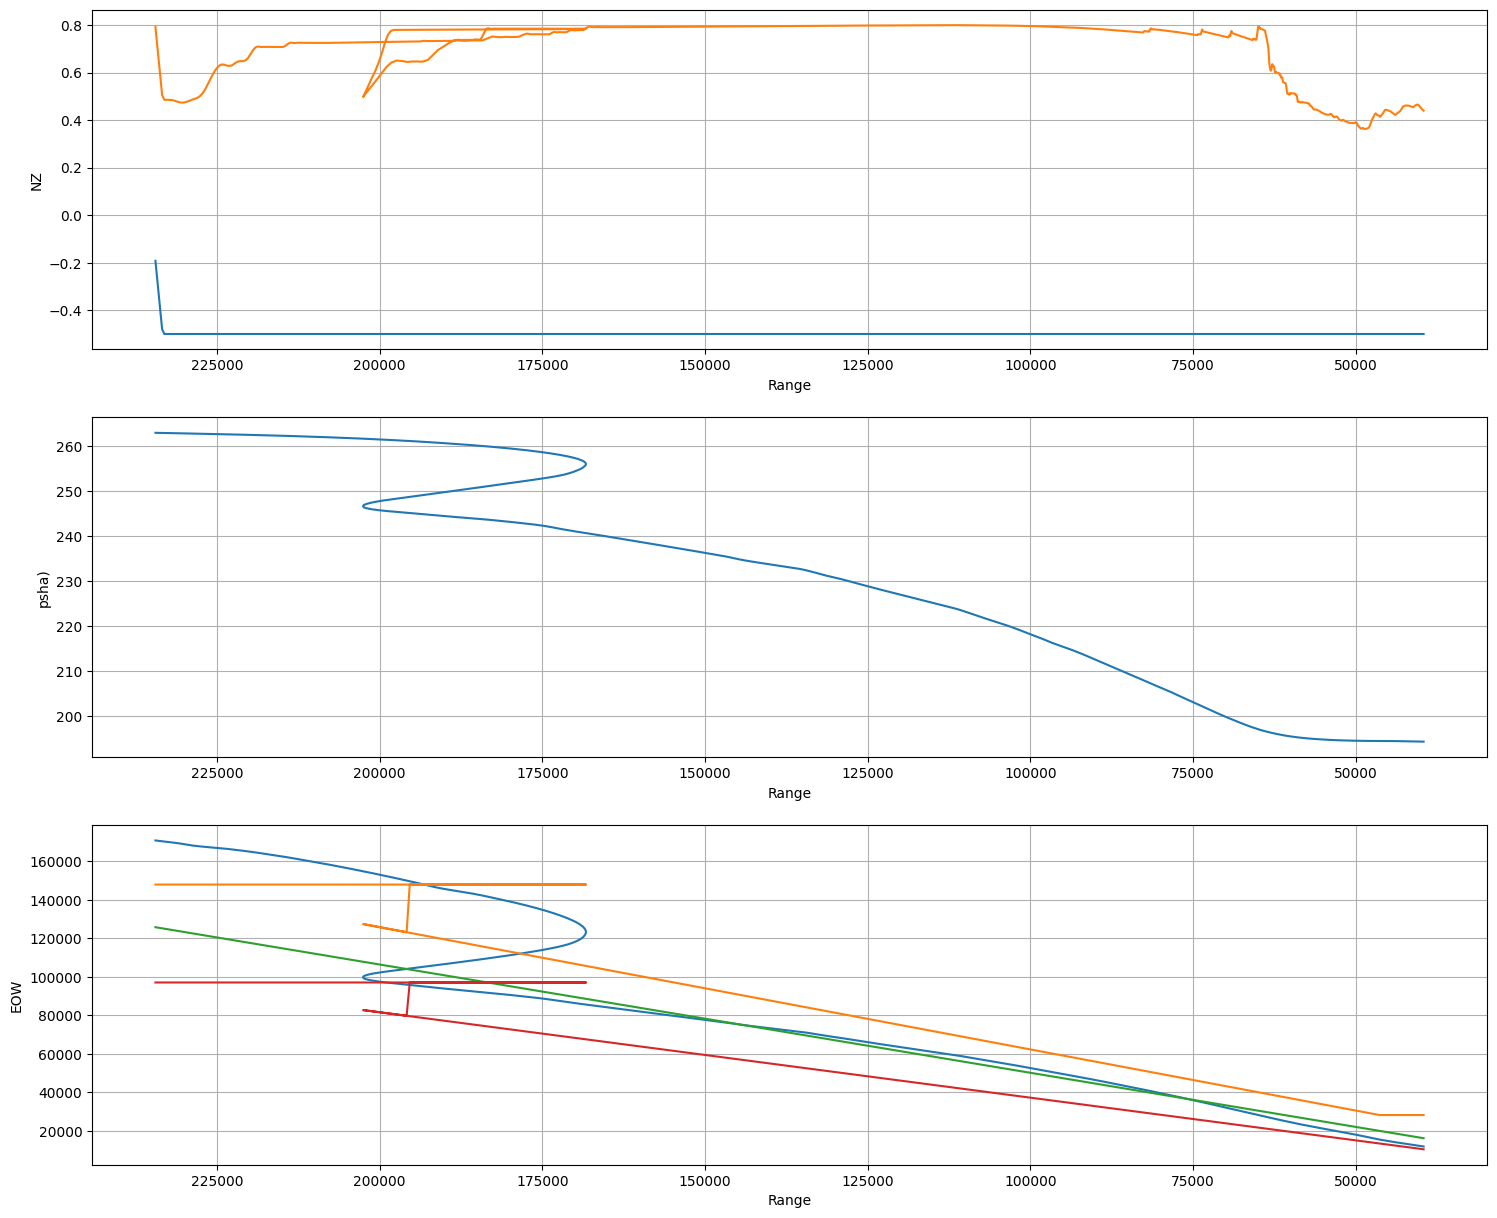

In [15]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    plt_ = ax_1[0]
    plt_.plot(data['time'], data['alt'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_ = ax_1[1]
    plt_.plot(data['time'], data['speed'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['rpred'], data['alt'])
    plt_.plot(data['rpred'], data['alt'] + data['herror'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['rpred'], data['speed'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    plt_ = ax
    plt_.plot(data['x'], data['y'])
    
    plt_.set_aspect('equal')

    plt_.grid()
    
    
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['rpred'], data['nzc'])
    plt_.plot(data['rpred'], data['nztotal'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('NZ')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.plot(data['rpred'], data['psha'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('psha)')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    plt_ = ax[2]
    plt_.plot(data['rpred'], data['eow'])
    plt_.plot(data['rpred'], data['es'])
    plt_.plot(data['rpred'], data['en'])
    plt_.plot(data['rpred'], data['emep'])
    

    plt_.set_xlabel('Range')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    
taem_plots(data_taem)